___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Autoencoder Exercise

## Complete the Tasks Below

**TASK: Run the imports below**

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [230]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

**TASK: Display the DataFrame**

In [231]:
#CODE HERE
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**TASK: Transpose the DataFrame so that the columns are now the index.**

In [232]:
#CODE HERE
df=df.transpose()

In [233]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

<AxesSubplot:>

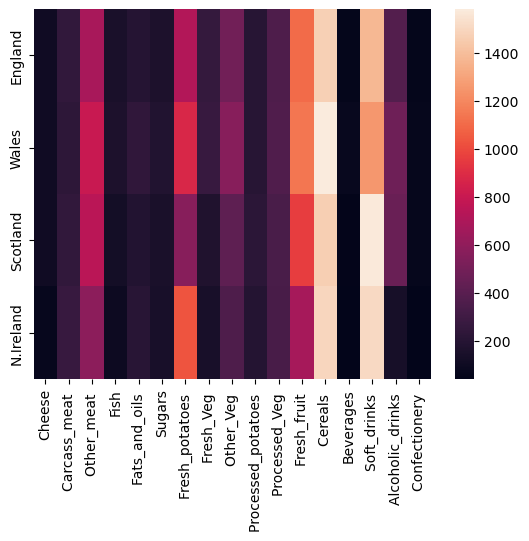

In [234]:
#CODE HERE
sns.heatmap(df)

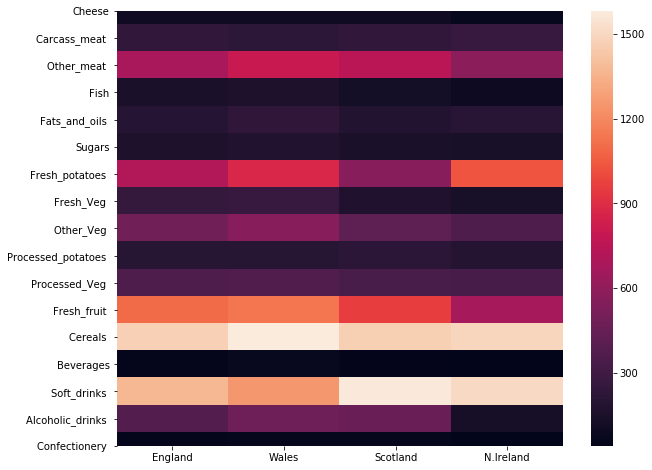

**TASK: Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [235]:
#CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**TASK: Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [236]:
#CODE HERE
encoder=Sequential()
encoder.add(Dense(units=8, activation='relu', input_shape=[17]))
encoder.add(Dense(units=4, activation='relu', input_shape=[8]))
encoder.add(Dense(units=2, activation='relu', input_shape=[4]))

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [237]:
#CODE HERE
decoder=Sequential()
decoder.add(Dense(units=4, activation='relu', input_shape=[2]))
decoder.add(Dense(units=8, activation='relu', input_shape=[4]))
decoder.add(Dense(units=17, activation='relu', input_shape=[8]))

**TASK: Combine the encoder and decoder to be an autoencoder and compile the model.**

In [238]:
#CODE HERE
autoencoder=Sequential([encoder,decoder])

**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [239]:
#CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [240]:
scaled_data=scaler.fit_transform(df)

In [241]:
sgd_optimizer = SGD(learning_rate=0.8)

In [242]:
autoencoder.compile(loss='mse',optimizer=sgd_optimizer)

In [243]:
scaled_data.shape

(4, 17)

In [244]:
type(scaled_data)

numpy.ndarray

In [21]:
# NOTE the shape should be 17 columns by 4 rows.

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [245]:
#CODE HERE
autoencoder.fit(scaled_data,scaled_data, epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - loss: 0.4255
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3844
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3506
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3249
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3050
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2907
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2805
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2735
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2687
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2654
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2631
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2615
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2602
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2592
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2583


Train on 4 samples
Epoch 1/15
4/4 [==============================] - 1s 139ms/sample - loss: 0.4271
Epoch 2/15
4/4 [==============================] - 0s 249us/sample - loss: 0.3847
Epoch 3/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2931
Epoch 4/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2485
Epoch 5/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2284
Epoch 6/15
4/4 [==============================] - 0s 230us/sample - loss: 0.2202
Epoch 7/15
4/4 [==============================] - 0s 755us/sample - loss: 0.2160
Epoch 8/15
4/4 [==============================] - 0s 248us/sample - loss: 0.2101
Epoch 9/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2065
Epoch 10/15
4/4 [==============================] - 0s 498us/sample - loss: 0.2037
Epoch 11/15
4/4 [==============================] - 0s 250us/sample - loss: 0.2028
Epoch 12/15
4/4 [==============================] - 0s 498us/sample - loss: 0.1995
Epoch 

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [246]:
#CODE HERE
encoded_2dim=encoder.predict(scaled_data)
encoded_2dim

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[0.        , 0.74648714],
       [0.        , 0.80117255],
       [0.        , 0.6753179 ],
       [0.        , 0.03757572]], dtype=float32)

array([[1.0482036 , 0.        ],
       [1.2070727 , 0.        ],
       [1.1669513 , 0.        ],
       [0.05854838, 0.        ]], dtype=float32)

**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [247]:
df_s=pd.DataFrame(encoded_2dim)
df_s

,0,1
0,0.0,0.746487
1,0.0,0.801173
2,0.0,0.675318
3,0.0,0.037576


In [248]:
df_s['index']=df.index

In [249]:
df_s

,0,1,index
0,0.0,0.746487,England
1,0.0,0.801173,Wales
2,0.0,0.675318,Scotland
3,0.0,0.037576,N.Ireland


<AxesSubplot:xlabel='0', ylabel='1'>

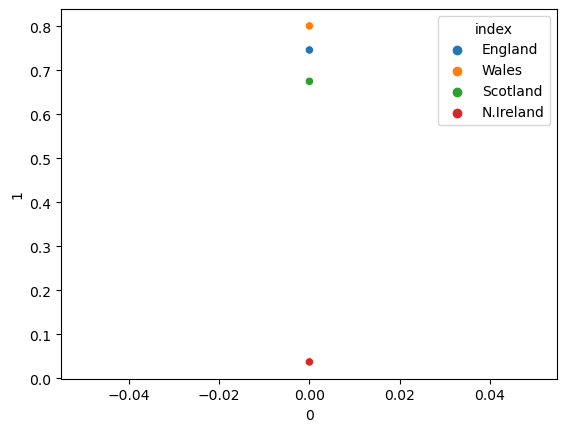

In [257]:
sns.scatterplot(x=0,y=1
                  , hue='index', data=df_s)

**TASK: Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

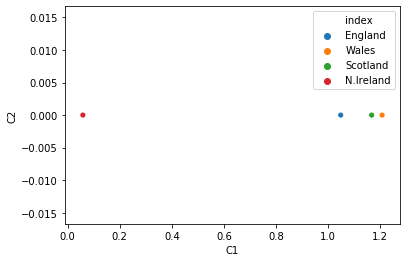

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain. (If you're confused about the differences among England, the UK and Great Britain, see: this [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)

**Second way for representation**

In [258]:
encoded_2dim

array([[0.        , 0.74648714],
       [0.        , 0.80117255],
       [0.        , 0.6753179 ],
       [0.        , 0.03757572]], dtype=float32)

In [262]:
df_2=pd.DataFrame(encoded_2dim, columns=['C1','C2'], index=df.index)

In [263]:
df_2

,C1,C2
England,0.0,0.746487
Wales,0.0,0.801173
Scotland,0.0,0.675318
N.Ireland,0.0,0.037576


In [265]:
df_2=df_2.reset_index()

In [266]:
df_2

,index,C1,C2
0,England,0.0,0.746487
1,Wales,0.0,0.801173
2,Scotland,0.0,0.675318
3,N.Ireland,0.0,0.037576


<AxesSubplot:xlabel='C1', ylabel='C2'>

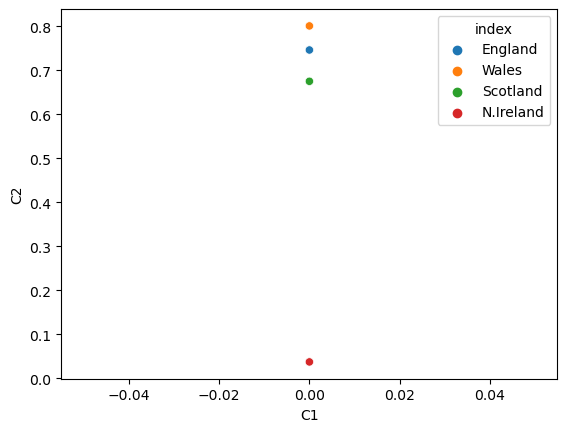

In [267]:
sns.scatterplot(data=df_2, x='C1', y='C2', hue='index')